In [1]:
# Import required libraries
import pandas as pd
import dash
from dash import html
from dash import dcc
from dash.dependencies import Input, Output
import plotly.express as px
import matplotlib.pyplot as plt

#Read the data into pandas dataframe
first_df = pd.read_csv("/Users/maggie/championsdata.csv")

max_court_home = first_df['Home'].max()
min_court_away = first_df['Home'].min()

In [2]:
# Create a dash application
app = dash.Dash(__name__)

# Create an app layout
app.layout = html.Div(children=[html.H1('NBA Finals Home Game Advantage Dashboard: 2010 - 2018',
                                        style={'textAlign': 'center', 'color': '#503D36',
                                               'font-size': 40}),
                                # TASK 1: Add a dropdown list to enable year selection
                                # The default select value is for ALL teams
                                dcc.Dropdown(
                                    id='team-dropdown',
                                    options=[
                                        {'label': 'All Champion Teams', 'value': 'ALL'},
                                        {'label': 'Lakers', 'value': 'Lakers'},
                                        {'label': 'Mavericks', 'value': 'Mavericks'},
                                        {'label': 'Heat', 'value': 'Heat'},
                                        {'label': 'Spurs', 'value': 'Spurs'},
                                        {'label': 'Warriors', 'value': 'Warriors'},
                                        {'label': 'Cavaliers', 'value': 'Cavaliers'},
                                    ],
                                    value='ALL',
                                    placeholder='Select a champion team here',
                                    searchable=True
                                    ),
                                html.Br(),

                                # TASK 2: Add a pie chart to show the total home court wins count for all teams
                                # If a specific team was selected, show the Win vs. Loss counts for the team at home
                                html.Div(dcc.Graph(id='at-home-win-pie-chart')),
                                html.Br(),
                                
                                # TASK 3: Add a pie chart to show the total away court wins count for all teams
                                # If a specific team was selected, show the Win vs. Loss counts for the team at away
                                html.Div(dcc.Graph(id='at-away-win-pie-chart')),
                                html.Br(),

                                ])

# TASK 2:
# Add a callback function for `team-dropdown` as input, `at-home-win-pie-chart` as output

@app.callback( Output(component_id='at-home-win-pie-chart', component_property='figure'),
               Input(component_id='team-dropdown', component_property='value'))

def get_pie_chart(entered_team):
    filtered_df = first_df
    if entered_team == 'ALL':
        fig = px.pie(first_df, values='Win At Home', names='Team', title='Total Home Court Wins By Team')
        return fig
    else:
        # return the outcomes piechart for a selected team
        filtered_df = first_df[first_df['Team'] == entered_team]
        filtered_df = filtered_df.groupby(['Team', 'Win At Home']).size().reset_index(name='win_count')
        fig = px.pie(filtered_df, values='win_count', names='Win At Home', title=f"Total Home Game Wins for Team {entered_team}")
        return fig

# TASK 3:
# Add a callback function for `team-dropdown` as input, `at-away-win-pie-chart` as output

@app.callback( Output(component_id='at-away-win-pie-chart', component_property='figure'),
               Input(component_id='team-dropdown', component_property='value'))

def get_pie_chart(entered_team):
    filtered_df = first_df
    if entered_team == 'ALL':
        fig = px.pie(first_df, values='Win At Away', names='Team', title='Total Away Court Wins By Team')
        return fig
    else:
        # return the outcomes piechart for a selected team
        filtered_df = first_df[first_df['Team'] == entered_team]
        filtered_df = filtered_df.groupby(['Team', 'Win At Away']).size().reset_index(name='win_count')
        fig = px.pie(filtered_df, values='win_count', names='Win At Away', title=f"Total Away Game Wins for Team {entered_team}")
        return fig

    
# Run the app
if __name__ == '__main__':
    app.run_server()

In [3]:
second_df = pd.read_csv("/Users/maggie/final_data.csv")
new_df = second_df[second_df['year']>1999]
new_df = new_df[['first','last','year','pts','reb','ast','stl','blk','turnover','fg_pct']]

In [4]:
new_df.head()

first     last  year    pts    reb   ast   stl   blk  turnover  fg_pct
454    Allen  Iverson  2000  31.08   3.85  4.58  2.51  0.28      3.34   0.420
455    Vince   Carter  2000  27.60   5.55  3.88  1.52  1.09      2.23   0.460
456    Tracy  McGrady  2000  26.82   7.53  4.57  1.51  1.53      2.57   0.457
457  Antonio    Davis  2000  13.71  10.09  1.36  0.28  1.94      1.73   0.433
458  Anthony    Mason  2000  16.13   9.63  3.10  1.00  0.31      2.24   0.482

In [5]:
print(new_df.dtypes)

first        object
last         object
year          int64
pts         float64
reb         float64
ast         float64
stl         float64
blk         float64
turnover    float64
fg_pct      float64
dtype: object


In [6]:
stats_df = pd.DataFrame()

for column in new_df:
    if column != 'first' and column != 'last' and column != 'year':
        new_column = new_df.groupby('year')[column].mean()
        if column == 'fg_pct':
            new_column = new_column * 100
        stats_df[f'avg_{column}'] = new_column
        
stats_df.head()

avg_pts   avg_reb   avg_ast   avg_stl   avg_blk  avg_turnover  \
year                                                                    
2000  21.262917  7.467917  4.074167  1.238750  1.050833      2.628333   
2001  21.296087  7.627391  4.612609  1.300870  0.983913      2.750000   
2002  21.195833  7.645417  4.479583  1.376250  1.035000      2.600833   
2003  20.145000  7.655000  4.182500  1.372083  1.154167      2.675417   
2004  22.002083  7.422500  4.023333  1.290000  1.091667      2.622083   

      avg_fg_pct  
year              
2000   46.308333  
2001   46.230435  
2002   46.037500  
2003   45.204167  
2004   47.512500

<Figure size 1000x1000 with 0 Axes>

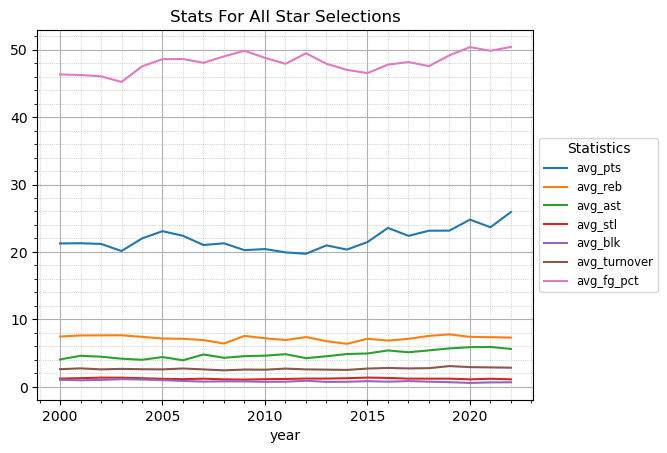

In [7]:
plt.figure(figsize = (10, 10))
stats_df.plot(kind = 'line', title = 'Stats For All Star Selections')
plt.xlabel = 'Year'
plt.legend(title = 'Statistics', loc = 'center left', bbox_to_anchor = (1, 0.5), fontsize = 'small')
plt.minorticks_on()
plt.grid(which = 'both', axis='both')
plt.grid(which = 'minor', linestyle = ':', linewidth = 0.5)
plt.show()